# Tackle titanic data set
Goal : predict whether or not passengger survived based on attributes such as their age, sex,passengger class, where they embarked and so on

In [85]:
# Load data
import os 
import urllib.request
titanic_path=os.path.join("datasets","titanic")
download_url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=download_url,path=titanic_path):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv","test.csv"):
        filepath=os.path.join(path,filename)
        if not os.path.isfile(filepath):
            print("Download ",filename)
            urllib.request.urlretrieve(url + filename,filepath)

fetch_titanic_data()

In [86]:
# call data
import pandas as pd
def load_titanic_data(filename,titanic_path=titanic_path):
    csv_path=os.path.join(titanic_path,filename)
    return pd.read_csv(csv_path)

train_data=load_titanic_data("train.csv")
test_data=load_titanic_data("test.csv")

In [87]:
# test data
print("Data:\n")
train_data.head()

Data:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Passengerld: unique identifier for each passenger

survived= that's the target, 0=>die, 1=>life(he/she)

Pclass=passenger class

Name,sex,age=slef explanatory

Sibsp=>how many siblings & spouses of passenger aboard the titanic

parch=how many parents and children of passnger aboard the titanic

ticket = ticket id

fare = price paid (in pounds)

cabin=passengers cabin number

embarked = where the passenger embarked the titanic

In [88]:
train_data=train_data.set_index("PassengerId")
test_data=test_data.set_index("PassengerId")

In [89]:
train_data.info()
# age and cabin have missing value
# name,sex,ticket,cabin,embarked is not numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [90]:
print("Shape:\n",train_data.shape)

Shape:
 (891, 11)


In [91]:
# analisis data

# set analisis the media of value girl
print(train_data[train_data["Sex"]=="female"]["Age"].median())
print(train_data[train_data["Sex"]=="male"]["Age"].median())

27.0
29.0


In [92]:
# lets look the numerical value descbribe
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
# check the target
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [94]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [95]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [96]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [97]:
train_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [98]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

In [99]:
# preprocesing data
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])

from sklearn.preprocessing import OneHotEncoder

cat_pipline=Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("cat_encoder",OneHotEncoder(sparse=False))#agar tidak sparse matrix,->keep dense matriks
])

# coloumn transform
from sklearn.compose import ColumnTransformer
num_atrbs=["Age","SibSp","Parch","Fare"]
cat_atrbs=["Pclass","Sex","Embarked"]

preprocess_pipline=ColumnTransformer([
    ("num",num_pipline,num_atrbs),
    ("cat",cat_pipline,cat_atrbs)
])


In [100]:
#transfrom the preprocessing
X_train=preprocess_pipline.fit_transform(train_data[num_atrbs+cat_atrbs])
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [101]:
X_test=preprocess_pipline.transform(test_data[num_atrbs+cat_atrbs])
X_test

array([[ 0.39488661, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.35550905,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.50825596, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.70228579, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [-0.10463705, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [-0.10463705,  0.43279337,  0.76762988, ...,  1.        ,
         0.        ,  0.        ]])

In [102]:
#get the label
y_train=train_data["Survived"]
print(y_train)
#cant to transform to scaler
# y_train=num_pipline.fit_transform([y_train])
# print(y_train)



PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64


In [104]:
# complete the preprocesing
# now ready to use model approch
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(n_estimators=100,random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [105]:
#make prediction with the model
y_pred=forest_clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [110]:
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [111]:
#validation the model random forest classifier(multiclass classifier)
from sklearn.model_selection import cross_val_score
forest_score=cross_val_score(forest_clf,X_train,y_train,cv=10)
forest_score.mean()

0.8137578027465668

In [115]:
# lets try other model->SVC (binary classifier)
from sklearn.svm import SVC
svm_clf=SVC(gamma="auto")
svm_clf.fit(X_train,y_train)
svm_scores=cross_val_score(svm_clf,X_train,y_train,cv=10)
svm_scores.mean()

0.8249313358302123

In [116]:
svm_pred=svm_clf.predict(X_test)
print(svm_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [117]:
print(y_train)

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64


cek the outlier (filler) with the function boxplot()
lower quartiel is Q1 and upper quartiel is Q3
interquartil is IQR=Q3-Q1

filler is called if score lower with
- Q1 - 1.5 X IQR
or score higher with
- Q3 + 1.5 X IQR

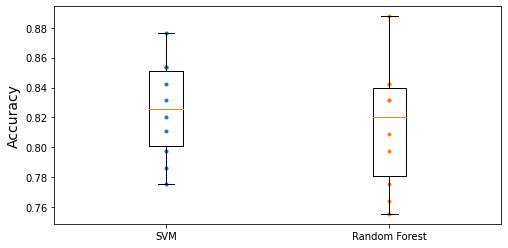

In [122]:
# visualisasti filler
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot([1]*10,svm_scores,".")
plt.plot([2]*10,forest_score,".")

plt.boxplot([svm_scores,forest_score],labels=("SVM","Random Forest"))
plt.ylabel("Accuracy",fontsize=14)
plt.show()

# ANALYSIS
the random forest have a highest value than SVM but the high score for predict is SVM most better than random forest classifier, and look up SVM more generalize than random forest the scale is so dumb.